In [7]:
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu
sys.path.append(os.environ["JUPYROOT"]) 
import RUtils as ru

import math
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from scipy import optimize

### Read data from ROOT histo

In [16]:
dataXY, n_binsXY, dBinsXY = ru.hist2np(file_path="DATA/noEDM.root", hist_path="AllStationsNoTQ/VertexExtap/t>0/0<p<3600/thetay_vs_time_modg2")

RUtils::hist2np Opening AllStationsNoTQ/VertexExtap/t>0/0<p<3600/thetay_vs_time_modg2 in DATA/noEDM.root
RUtils::hist2np Opened Name: thetay_vs_time_modg2 Title:   NbinsX: 300 <class 'float'> with 2937381 entries (exc. over/underflows)


### Convert rad -> mrad

In [17]:
dataXY[1]=dataXY[1]*1e3
print(dataXY[1])

[-94.75 -94.75 -94.35 ...  97.45  98.15  98.35]


### Plot the 2D histo

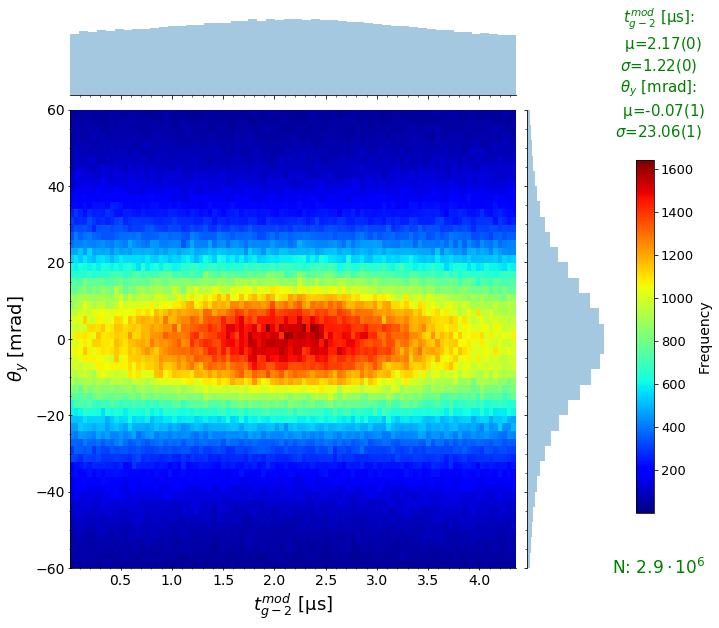

In [21]:
jg,cb,legendX,legendY =cu.plotHist2D(dataXY[0], dataXY[1], n_binsXY=(100, 100), cmin=0, prec=2)
jg.ax_joint.set_ylabel(r"$\theta_y$ [mrad]", fontsize=18)
jg.ax_joint.set_xlabel(r"$t^{mod}_{g-2} \ \mathrm{[\mu}$s]", fontsize=18)
# jg.ax_joint.set_xlabel(r"$t \ \mathrm{[\mu}$s]", fontsize=18)
cu.textL(jg.ax_joint, 1.32, 1.15, r"$t^{mod}_{g-2} \ \mathrm{[\mu}$s]:"+"\n"+str(legendX), font_size=15)
# cu.textL(jg.ax_joint, 1.32, 1.15, r"$t \ \mathrm{[\mu}$s]:"+"\n"+str(legendX), font_size=15)
cu.textL(jg.ax_joint, 1.32, 1.00, r"$\theta_y$ [mrad]:"+"\n"+str(legendY), font_size=15)
N=cu.sci_notation(len(dataXY[0])) # format as a 
cu.textL(jg.ax_joint, 1.32, 0.00, "N: "+N, font_size=17)
# jg.ax_joint.set_xlim(0, 100)
jg.ax_joint.set_ylim(-60, 60)
plt.savefig("fig/thetavsT.png", dpi=300)

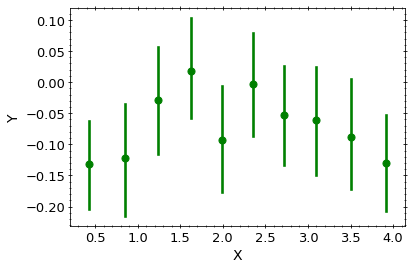

In [22]:
ax=cu.plotProfileSNS(dataXY[0], dataXY[1], x_estimator=np.mean, bins=10, fit_bool=False, ci=95, marker="o", color="green", font_size=14)
